<a href="https://colab.research.google.com/github/shaikarif333/python-daily-task/blob/main/shaik_Arif_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [1]:
import numpy as np
import pandas as pd
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df=pd.DataFrame(data,index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


**3.** Return the first 3 rows of the DataFrame `df`.

In [3]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [4]:
df[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [5]:
df.iloc[[3,4,8],[0,1]]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [6]:
df[df["visits"]>3]

,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [7]:
df[df["age"].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [8]:
df[(df['animal']=='cat') & (df['age']<3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [9]:
df[(df['age']>=2) & (df['age']<=4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [11]:
df.loc['f','age']=1.5
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [12]:
totalvisits=df['visits'].sum()
totalvisits

19

**12.** Calculate the mean age for each different animal in `df`.

In [13]:
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [14]:
df.loc['k']=['snake',3,2,'no']
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**14.** Count the number of each type of animal in `df`.

In [15]:
df.groupby('animal').size()

animal
cat      4
dog      4
snake    3
dtype: int64

**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [16]:
df.sort_values(by=['age','visits'],ascending=[False,True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
k,snake,3.0,2,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [17]:
df['priority']=df['priority'].replace({'yes':True,'no':False})
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [18]:
df['animal']=df['animal'].replace({'snake':'python'})
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


**18.** Load the ny-flights dataset to Python

In [19]:
import pandas as pd
df=pd.read_csv('ny-flights.csv')
df

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


**19.** Which airline ID is present maximum times in the dataset

In [20]:
pd.value_counts(df['airline_id'])

airline_id
20409    4902
19790    3803
20398    2434
19805    2427
20366    2080
19393    1917
20355    1568
19977    1106
21171     301
20437     206
20436      33
19690      29
20304      11
Name: count, dtype: int64

**20.** Draw a plot between dep_delay and arr_delay

In [21]:
pd.value_counts(df['airline_id']).idxmax()

20409

DATA ANALYSING OF DIABETES DATA SET

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv("diabetes_model.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,77,82,41,42,35.8,0.156,35,0
1,9,122,56,0,0,33.3,1.114,33,1
2,0,113,76,0,0,33.3,0.278,23,1
3,1,139,62,41,480,40.7,0.536,21,0
4,10,161,68,23,132,25.5,0.326,47,1
5,2,68,70,32,66,25.0,0.187,25,0
6,2,108,80,0,0,27.0,0.259,52,1
7,2,122,52,43,158,36.2,0.816,28,0
8,3,120,70,30,135,42.9,0.452,30,0
9,3,61,82,28,0,34.4,0.243,46,0


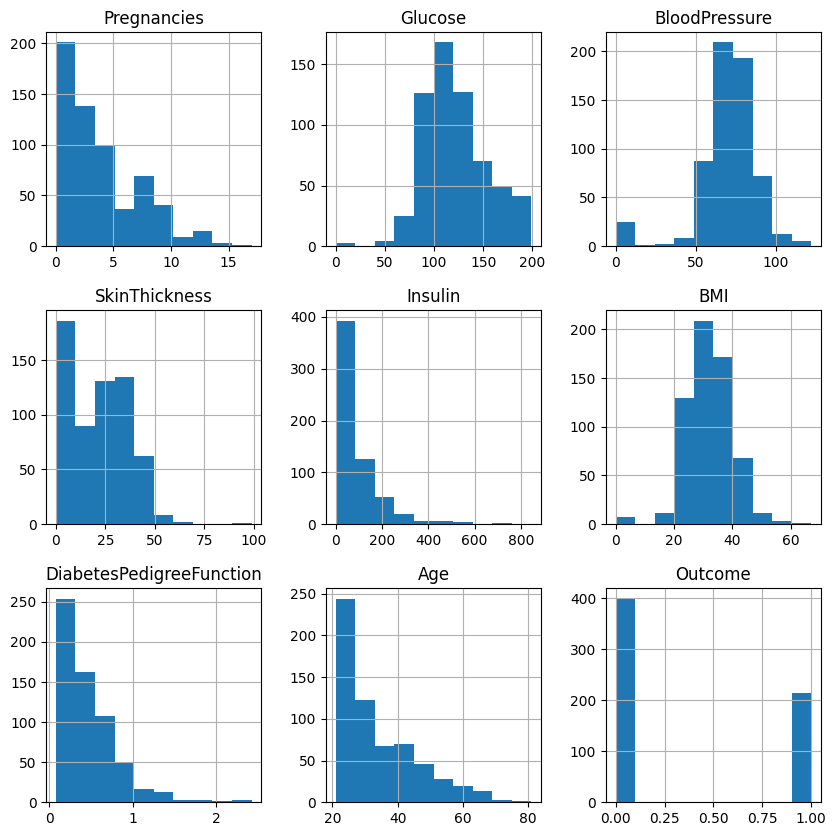

In [25]:
data.hist(figsize=(10,10))
plt.show()

In [26]:
#insights of outcomes whether patient is healthy or diabetic

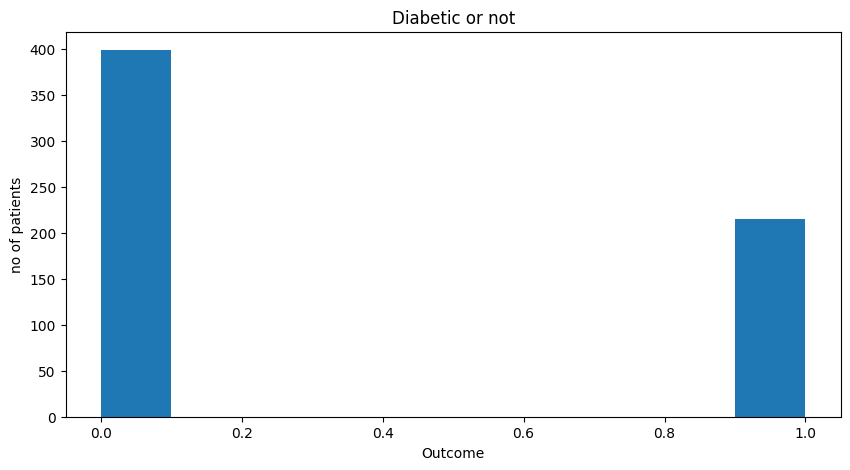

In [27]:
plt.figure(figsize=(10,5))
plt.hist(data["Outcome"] )
plt.title('Diabetic or not')
plt.xlabel('Outcome')
plt.ylabel('no of patients')
plt.show()

In [28]:
#glucose rate

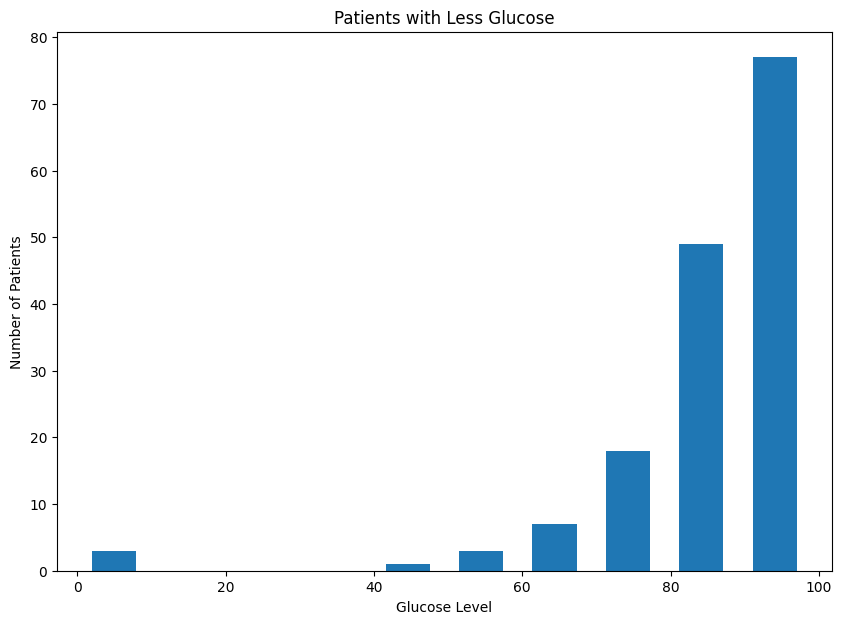

In [29]:
plt.figure(figsize=(10,7))
less_glucose = data[data['Glucose'] < 100]
plt.hist(less_glucose['Glucose'],rwidth= 0.6)
plt.title('Patients with Less Glucose')
plt.xlabel('Glucose Level')
plt.ylabel('Number of Patients')
plt.show()

In [31]:
#no of pregnancies

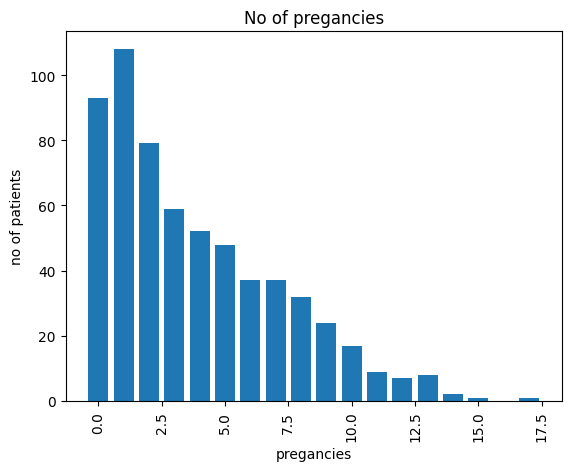

In [32]:
plt.bar(data['Pregnancies'].value_counts().index, data['Pregnancies'].value_counts().values)
plt.title('No of pregancies')
plt.xlabel('pregancies')
plt.ylabel('no of patients')
plt.xticks(rotation = 90)
plt.show()

In [33]:
#insulin value

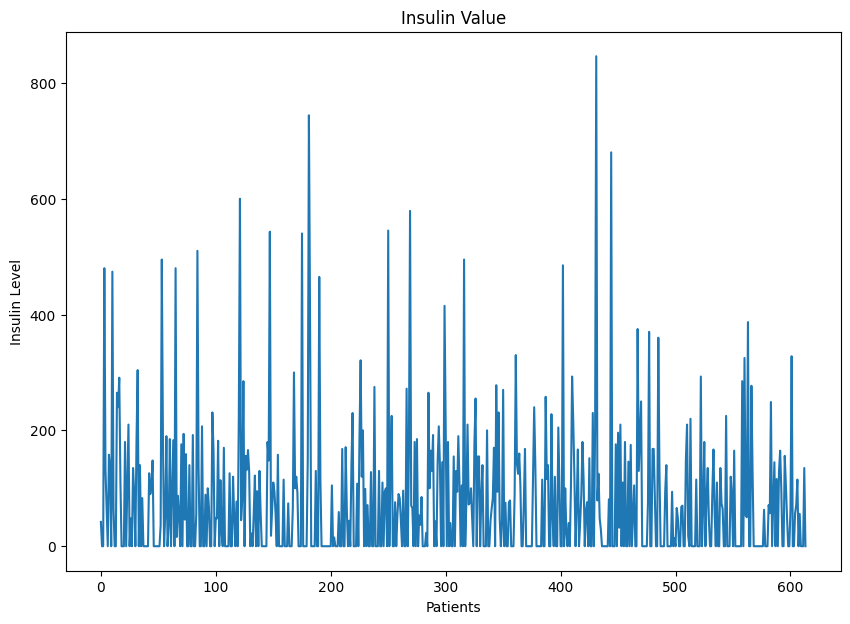

In [34]:
plt.figure(figsize=(10,7))
plt.plot(data['Insulin'])
plt.title('Insulin Value')
plt.xlabel('Patients')
plt.ylabel('Insulin Level')
plt.show()

In [35]:
#blood pressure

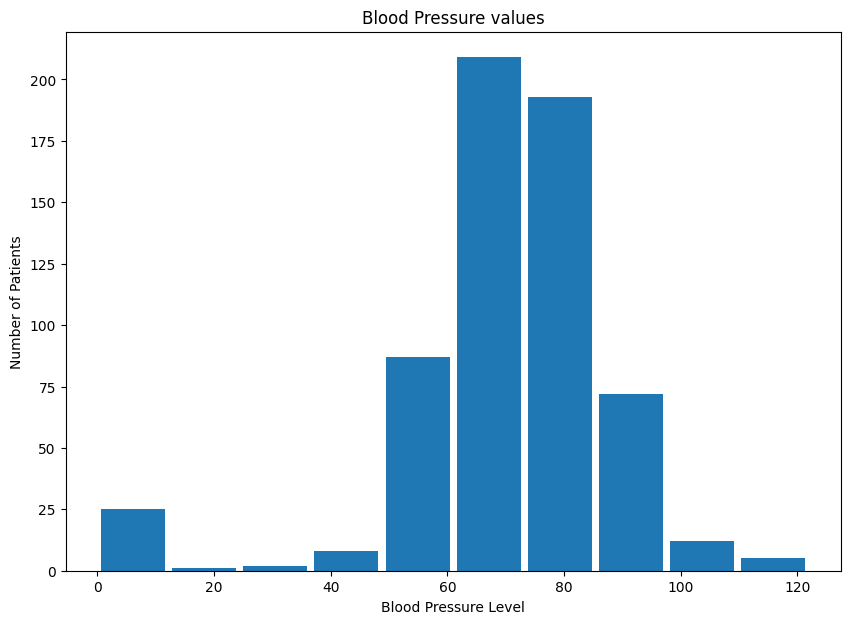

In [36]:
plt.figure(figsize=(10,7))
plt.hist(data['BloodPressure'],rwidth= 0.9)
plt.title('Blood Pressure values')
plt.xlabel('Blood Pressure Level')
plt.ylabel('Number of Patients')
plt.show()


In [37]:
#scatter plot based on DBF and outcome

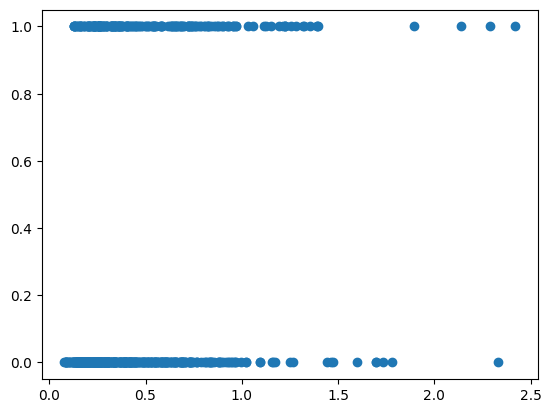

In [38]:
plt.scatter(data['DiabetesPedigreeFunction'],data['Outcome'])

plt.show()

In [39]:
#age and outcomes

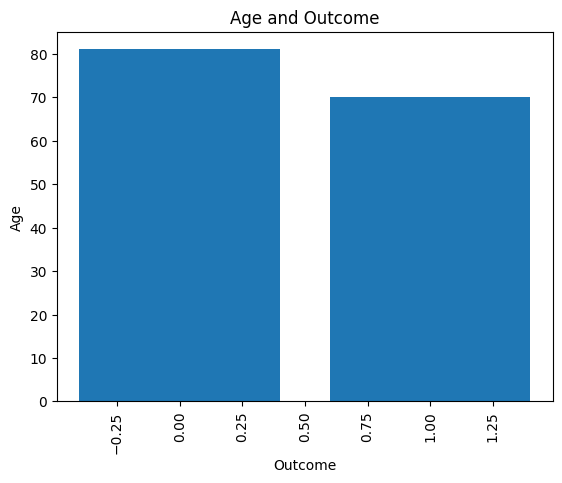

In [40]:
plt.bar(data['Outcome'], data['Age'])
plt.title('Age and Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

In [41]:
#heat map

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.137245       0.165089      -0.101968   
Glucose                      0.137245  1.000000       0.151446       0.073133   
BloodPressure                0.165089  0.151446       1.000000       0.209564   
SkinThickness               -0.101968  0.073133       0.209564       1.000000   
Insulin                     -0.083955  0.320291       0.083704       0.433628   
BMI                         -0.005699  0.237282       0.283813       0.379994   
DiabetesPedigreeFunction    -0.039171  0.134167       0.025739       0.180571   
Age                          0.552744  0.251873       0.227663      -0.111832   
Outcome                      0.201069  0.478688       0.056902       0.086276   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.083955 -0.005699                 -0.039171   
Glucose                   0.320291  0.237

<Axes: >

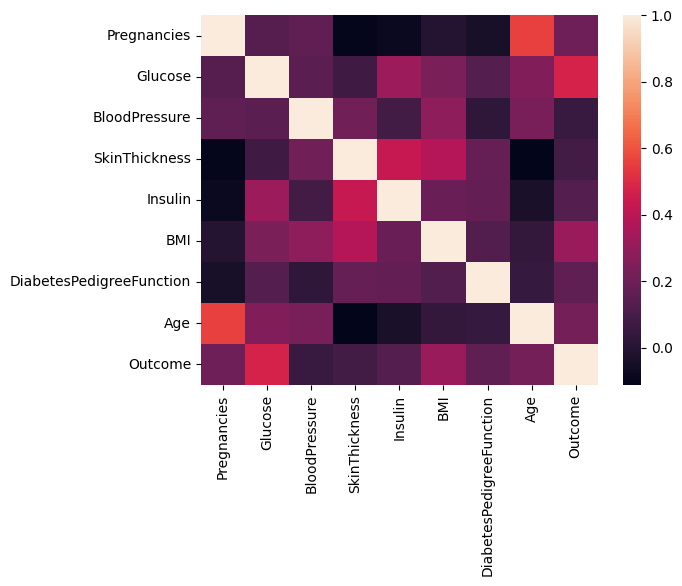

In [42]:
corr = data.corr()
print(corr)
sns.heatmap(corr,
         xticklabels=corr.columns,
         yticklabels=corr.columns)

In [43]:
#pair plot

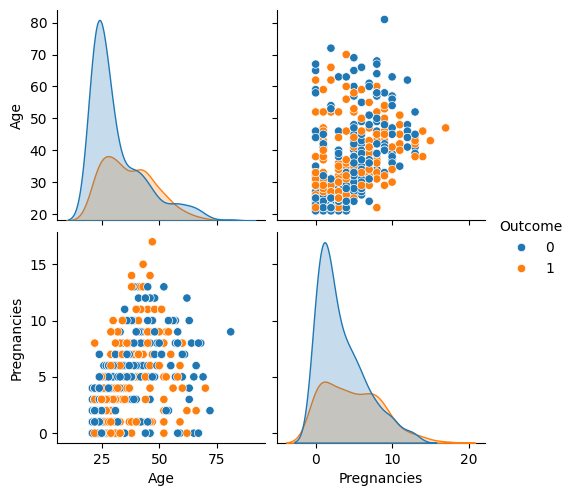

In [44]:
sns.pairplot(data, vars=["Age", "Pregnancies"], hue="Outcome", kind="scatter")
plt.show()

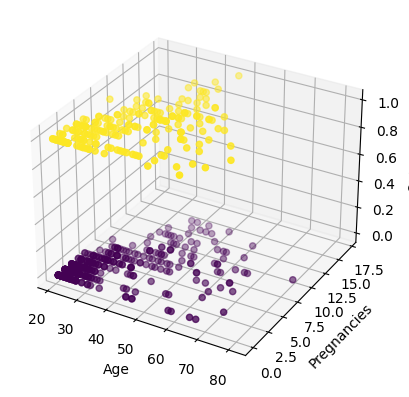

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = data['Age']
y = data['Pregnancies']
z = data['Outcome']

ax.scatter(x, y, z, c=z)

ax.set_xlabel('Age')
ax.set_ylabel('Pregnancies')
ax.set_zlabel('Outcome')

plt.show()

**DATA ANALYSING OF NY-FLIGHTS DATASET**

In [46]:
data2 = pd.read_csv("ny-flights.csv")

In [47]:
data2.head(10)

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
5,2014-01-01 00:00:00,AA,19805,N323AA,185,JFK,LAX,2133.0,-2.0,37.0,-18.0,0.0,2014-01-01 00:37:00,2014-01-01 21:33:00
6,2014-01-01 00:00:00,AA,19805,N328AA,133,JFK,LAX,1542.0,-3.0,1906.0,-14.0,0.0,2014-01-01 19:06:00,2014-01-01 15:42:00
7,2014-01-01 00:00:00,AA,19805,N5FJAA,145,JFK,MIA,1509.0,-1.0,1828.0,-17.0,0.0,2014-01-01 18:28:00,2014-01-01 15:09:00
8,2014-01-01 00:00:00,AA,19805,N3HYAA,235,JFK,SEA,1848.0,-2.0,2206.0,-14.0,0.0,2014-01-01 22:06:00,2014-01-01 18:48:00
9,2014-01-01 00:00:00,AA,19805,N332AA,177,JFK,SFO,1752.0,7.0,2120.0,-5.0,0.0,2014-01-01 21:20:00,2014-01-01 17:52:00


In [48]:
print(data2.shape)
print(data2.columns)
print(data2.dtypes)

(20817, 14)
Index(['fl_date', 'unique_carrier', 'airline_id', 'tail_num', 'fl_num',
       'origin', 'dest', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay',
       'cancelled', 'arr', 'dep'],
      dtype='object')
fl_date            object
unique_carrier     object
airline_id          int64
tail_num           object
fl_num              int64
origin             object
dest               object
dep_time          float64
dep_delay         float64
arr_time          float64
arr_delay         float64
cancelled         float64
arr                object
dep                object
dtype: object


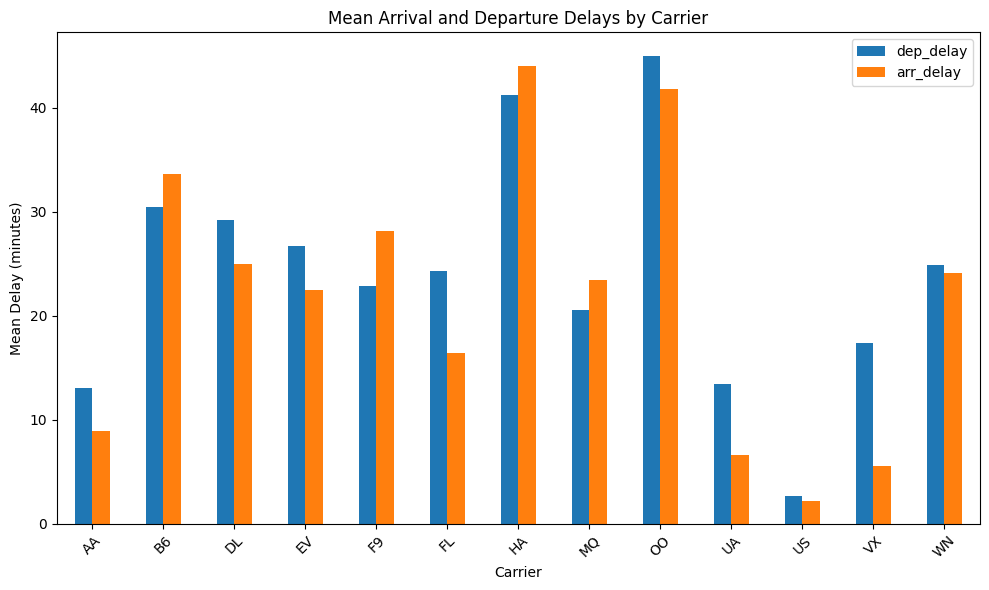

In [49]:
carrier_delays = data2.groupby('unique_carrier')[['dep_delay', 'arr_delay']].mean()

# Create a bar graph
carrier_delays.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Arrival and Departure Delays by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Mean Delay (minutes)')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

            airline_id    fl_num  dep_time  dep_delay  arr_time  arr_delay  \
airline_id    1.000000  0.165427  0.068787  -0.001510  0.000359   0.018637   
fl_num        0.165427  1.000000  0.037538   0.003662  0.015185   0.009601   
dep_time      0.068787  0.037538  1.000000   0.205036  0.658571   0.168048   
dep_delay    -0.001510  0.003662  0.205036   1.000000  0.033294   0.952380   
arr_time      0.000359  0.015185  0.658571   0.033294  1.000000   0.013732   
arr_delay     0.018637  0.009601  0.168048   0.952380  0.013732   1.000000   
cancelled     0.081613  0.113438  0.008808   0.088048       NaN        NaN   

            cancelled  
airline_id   0.081613  
fl_num       0.113438  
dep_time     0.008808  
dep_delay    0.088048  
arr_time          NaN  
arr_delay         NaN  
cancelled    1.000000  


<Axes: >

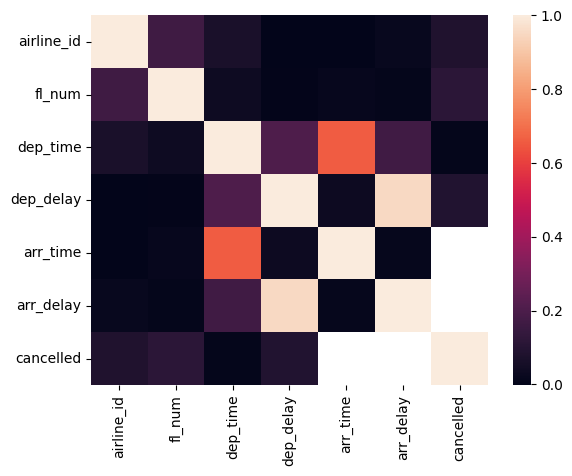

In [50]:

data2['fl_date'] = pd.to_datetime(data2['fl_date'])


numeric_data = data2.select_dtypes(include=['float', 'int'])


corr = numeric_data.corr()
print(corr)



sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

In [51]:
seattle_flights = data2[data2['dest'] == 'SEA']
seattle_flights.name = 'Flights to Seattle'
print(seattle_flights.head())

       fl_date unique_carrier  airline_id tail_num  fl_num origin dest  \
8   2014-01-01             AA       19805   N3HYAA     235    JFK  SEA   
130 2014-01-01             B6       20409   N593JB     263    JFK  SEA   
272 2014-01-01             DL       19790   N727TW     440    JFK  SEA   
273 2014-01-01             DL       19790   N686DA     442    JFK  SEA   
946 2014-01-02             AA       19805   N3BCAA     235    JFK  SEA   

     dep_time  dep_delay  arr_time  arr_delay  cancelled                  arr  \
8      1848.0       -2.0    2206.0      -14.0        0.0  2014-01-01 22:06:00   
130    1905.0       18.0    2214.0        7.0        0.0  2014-01-01 22:14:00   
272     906.0       86.0    1216.0       79.0        0.0  2014-01-01 12:16:00   
273    1838.0       -2.0    2159.0       -4.0        0.0  2014-01-01 21:59:00   
946       NaN        NaN       NaN        NaN        1.0                  NaN   

                     dep  
8    2014-01-01 18:48:00  
130  2014-01-0

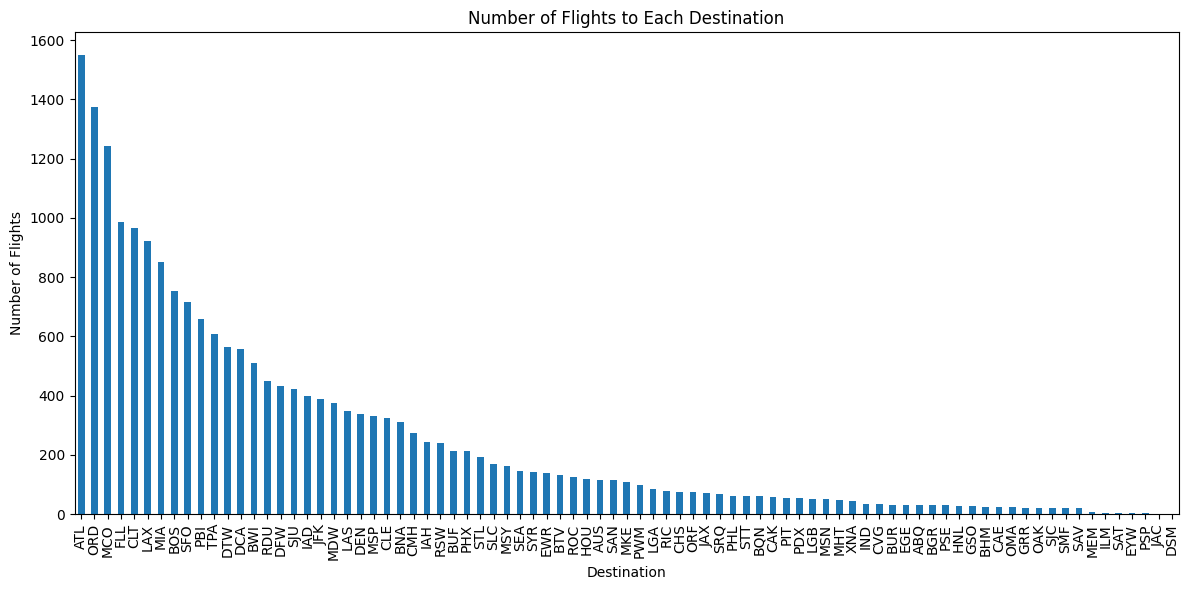

In [52]:
destination_counts = data2['dest'].value_counts()

plt.figure(figsize=(12, 6))
destination_counts.plot(kind='bar')
plt.title('Number of Flights to Each Destination')
plt.xlabel('Destination')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()